In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.weightstats import ztest


In [3]:
pd.set_option('display.max_row',30)
pd.set_option('display.max_column',111)

# Data importing

In [4]:
df=pd.read_excel(r'C:\Users\chene\OneDrive\Bureau\dataset.xlsx')
df.head(10)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

# I-Exploratory data analysis

### 1. understand our data format

In [5]:
df.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [6]:
df.shape

(5644, 111)

In [7]:
df.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [8]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

In [9]:
# we have 111 columns we have to do feture selection 

### 2. handeling missing values

In [10]:
# I'm going to eliminate the patient id column beause ...


In [11]:
df=df.drop('Patient ID',axis=1)

<AxesSubplot:>

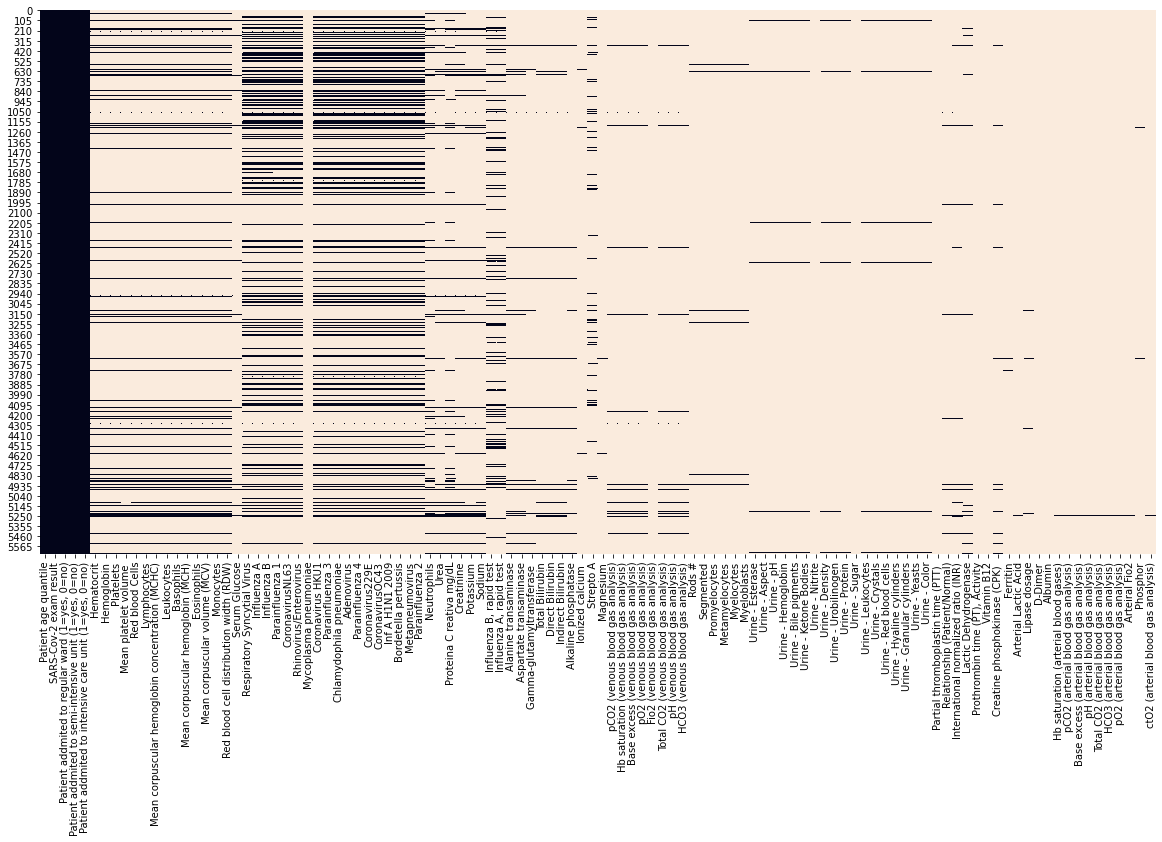

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [13]:
## the white color shows us how many missing values we have 

In [14]:
(df.isna().sum()/df.shape[0])# the sum of the missing values

Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
                                                           ...   
HCO3 (arterial blood gas analysis)                       0.995216
pO2 (arterial blood gas analysis)                        0.995216
Arteiral Fio2                                            0.996456
Phosphor                                                 0.996456
ctO2 (arterial blood gas analysis)                       0.995216
Length: 110, dtype: float64

In [15]:
# we have alot of nan variables , so we are going to eliminate the columns with nan percentage >90%

In [16]:
df=df[df.columns[df.isna().sum()/df.shape[0]<=0.9]] #dropping the columns with nan variable percentage >90

In [17]:
df

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,3,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,17,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,4,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,10,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

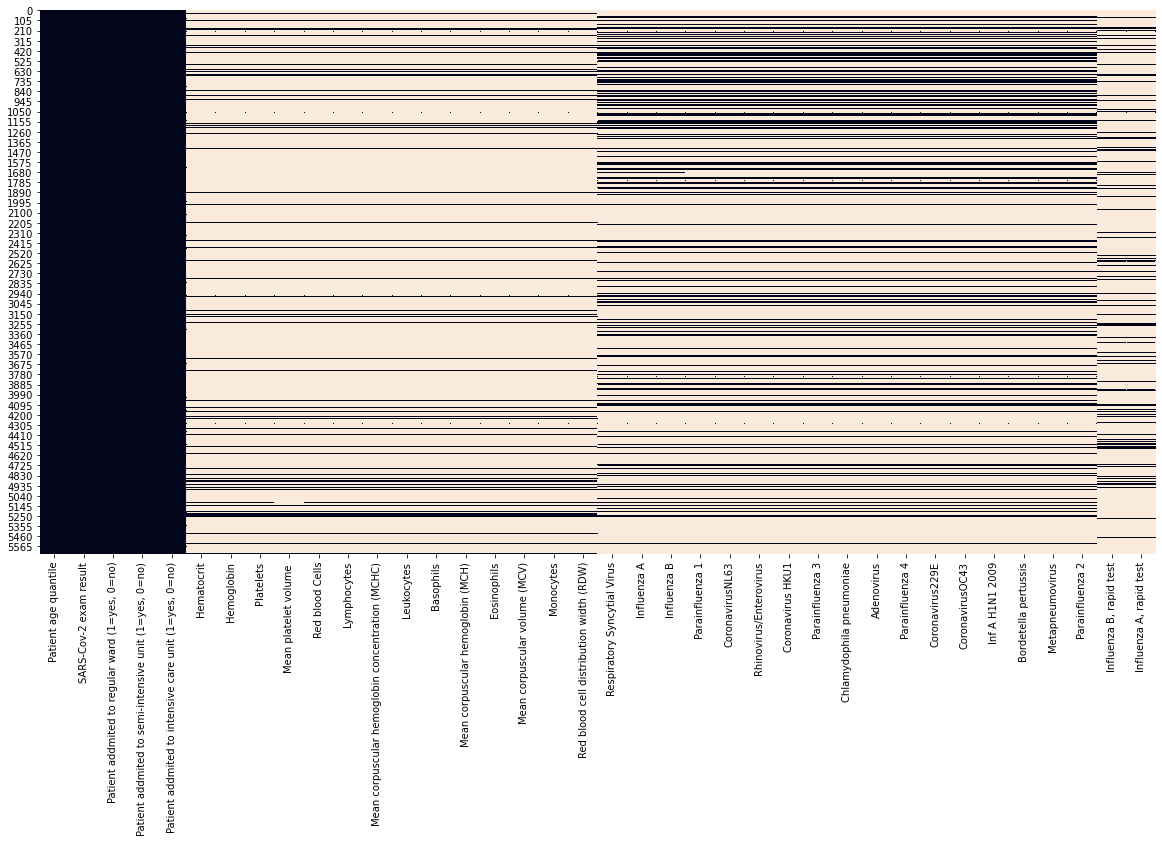

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)
# the nan variable dicreased 

### 3- Examining the target variable 

In [19]:
df['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

### 4- Examining the quantitative variables

In [20]:
# let's see our numerical columns 

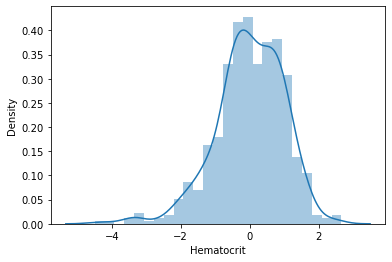

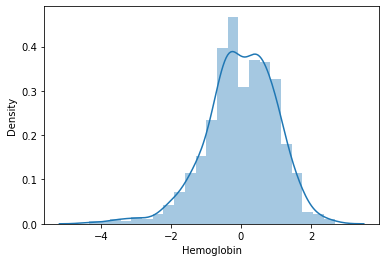

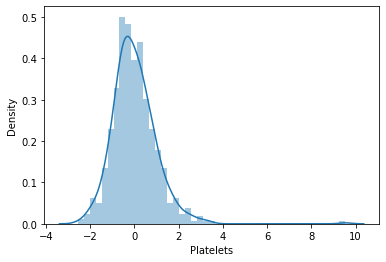

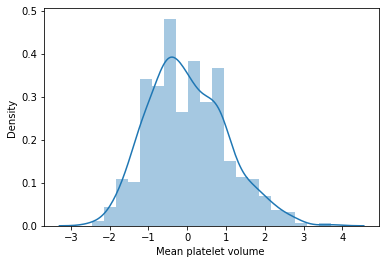

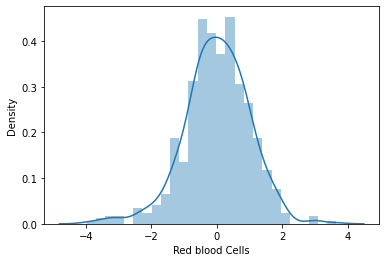

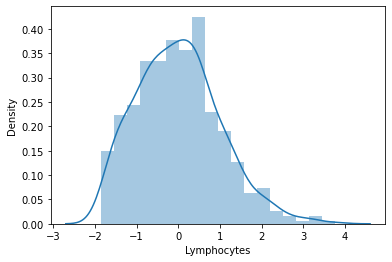

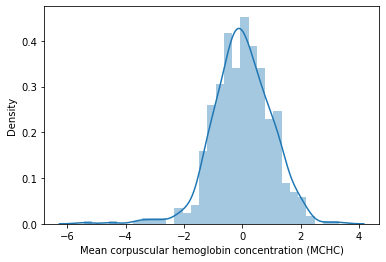

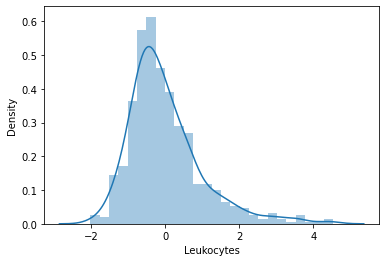

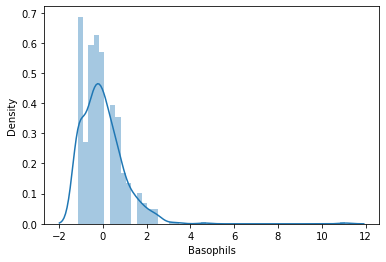

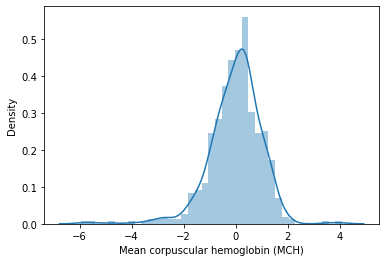

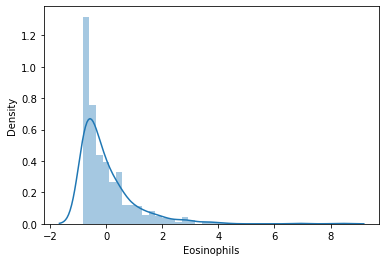

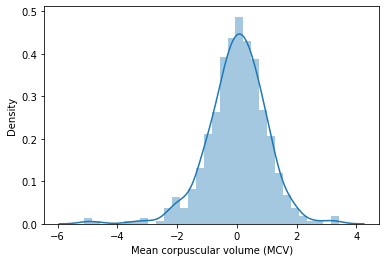

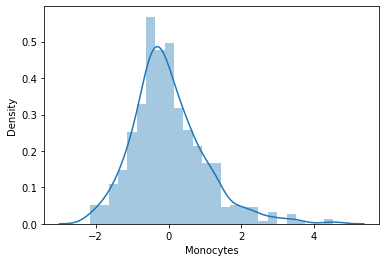

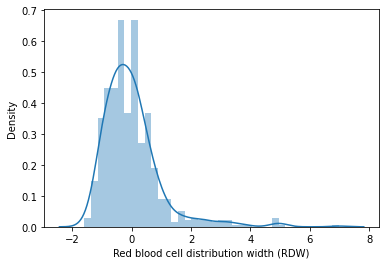

In [21]:
for column in df[df.columns[df.dtypes==float]]:
    plt.figure();
    sns.distplot(df[column]);

In [22]:
# some variables standarized 

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

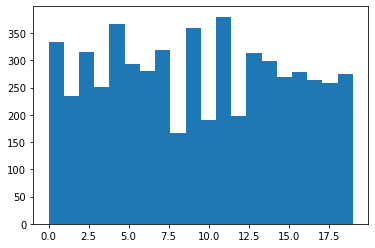

In [28]:
plt.hist(df['Patient age quantile'],bins=20)
df['Patient age quantile'].value_counts()

### 5- Examining the qualitative variables / VARIABLES DISCréte=viral variables

In [29]:
# let's see non numerical columns and their different categories

In [30]:
for column in df[df.columns[df.dtypes==object]]:
    print(column,' :')
    print(df[column].unique())
    print(df[column].value_counts())
    print('********')

SARS-Cov-2 exam result  :
['negative' 'positive']
negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64
********
Respiratory Syncytial Virus  :
[nan 'not_detected' 'detected']
not_detected    1302
detected          52
Name: Respiratory Syncytial Virus, dtype: int64
********
Influenza A  :
[nan 'not_detected' 'detected']
not_detected    1336
detected          18
Name: Influenza A, dtype: int64
********
Influenza B  :
[nan 'not_detected' 'detected']
not_detected    1277
detected          77
Name: Influenza B, dtype: int64
********
Parainfluenza 1  :
[nan 'not_detected' 'detected']
not_detected    1349
detected           3
Name: Parainfluenza 1, dtype: int64
********
CoronavirusNL63  :
[nan 'not_detected' 'detected']
not_detected    1307
detected          45
Name: CoronavirusNL63, dtype: int64
********
Rhinovirus/Enterovirus  :
[nan 'detected' 'not_detected']
not_detected    973
detected        379
Name: Rhinovirus/Enterovirus, dtype: int64
********
Coronavirus HKU1

# 6-Relationship Target/ quantitave variables= blood data

In [31]:
# I'm going to divide my data into two categories : with positive covid test  and with negative covid test

In [32]:
positive_test=df[(df['SARS-Cov-2 exam result']=='positive')]
negative_test=df[(df['SARS-Cov-2 exam result']=='negative')]


In [33]:
# see the variable's behaviour with those two categories

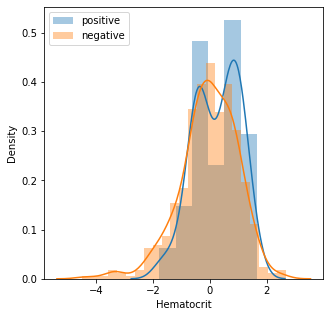

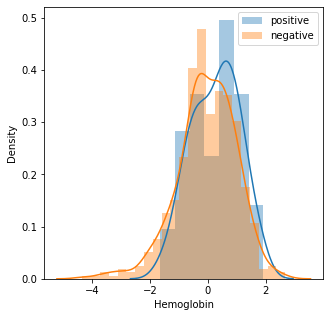

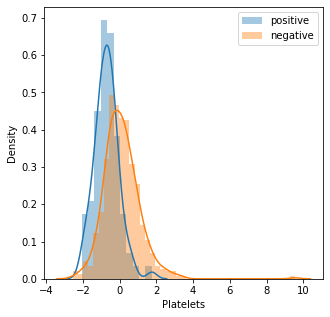

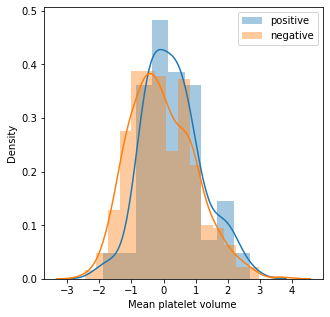

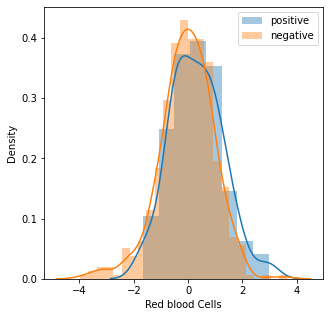

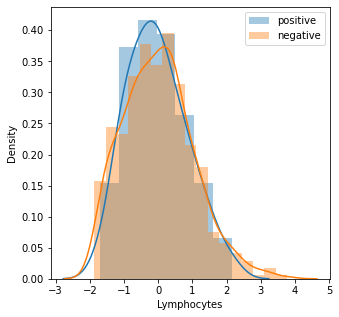

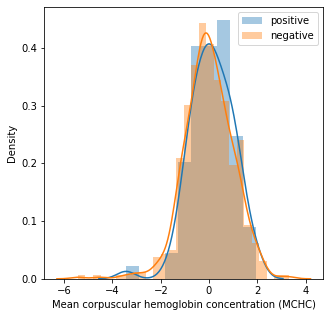

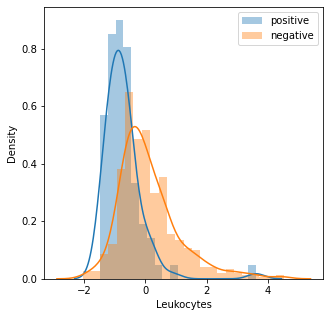

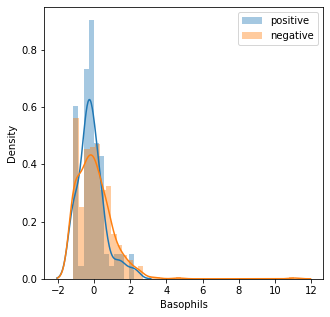

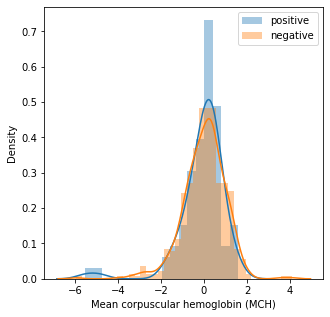

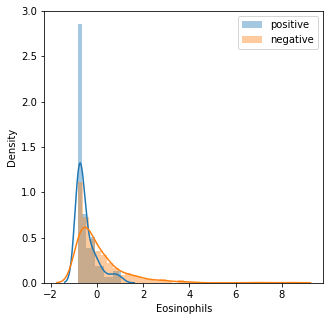

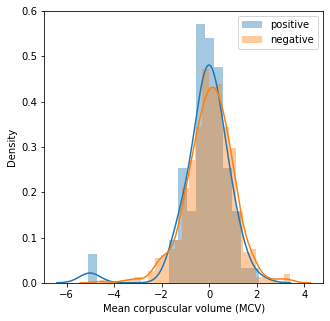

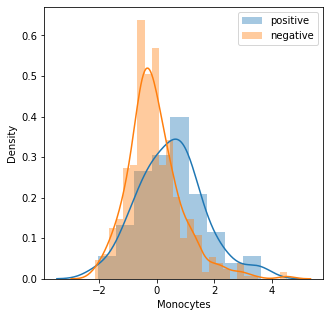

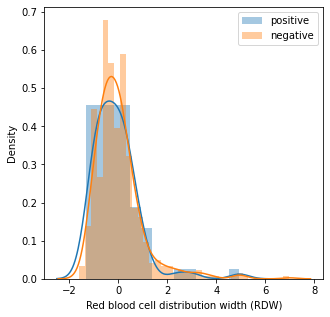

In [34]:
for col in df.columns[df.dtypes==float]:
    plt.figure(figsize=(5,5))
    sns.distplot(positive_test[col],label='positive')
    sns.distplot(negative_test[col],label='negative')
    plt.legend()

In [35]:
#as we can see the two curves of the hematocrit variable has a small difference , 
#but with the platelets variable theri is quite a differnce between the two curves
# so we can conclude that the plateltes, monocytes,Leukocytes variable , change with the target categories  , so those variables have strong relationship with the coranavirus result

# 7-TARGET / AGE

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

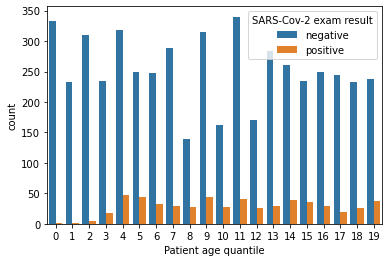

In [36]:
sns.countplot(x='Patient age quantile',hue='SARS-Cov-2 exam result',data=df)

# 8-Target/ viral

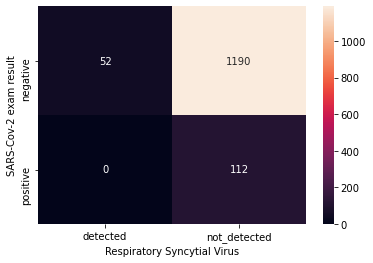

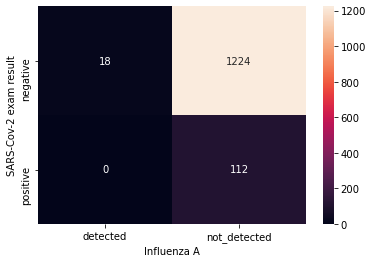

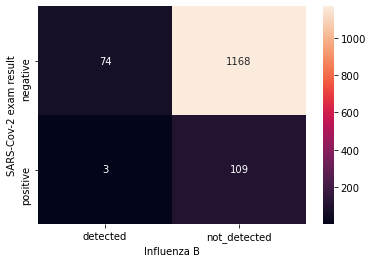

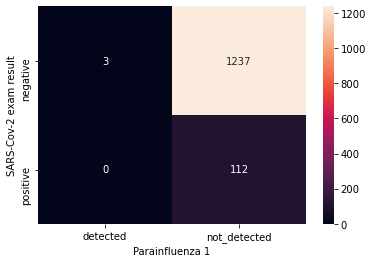

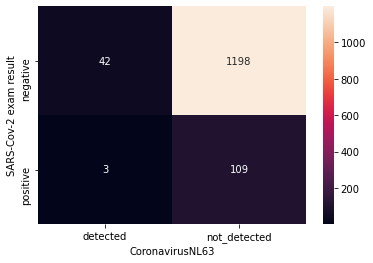

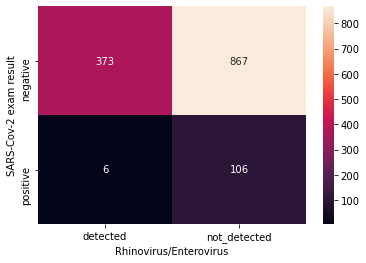

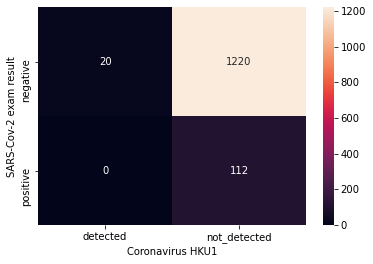

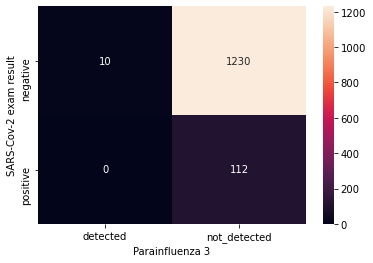

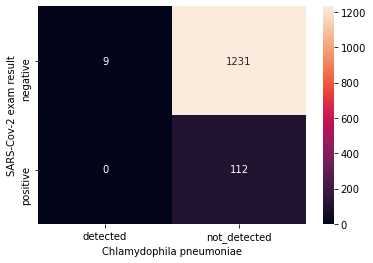

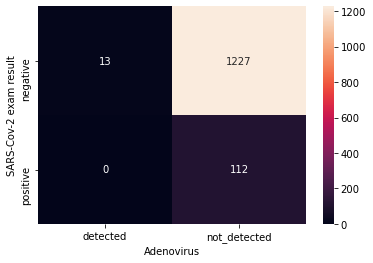

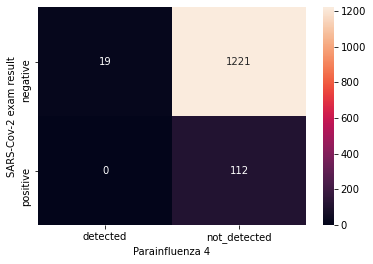

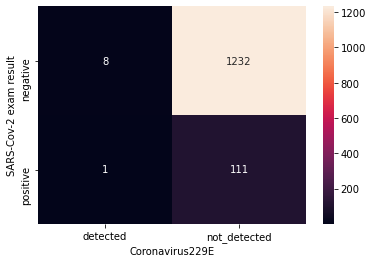

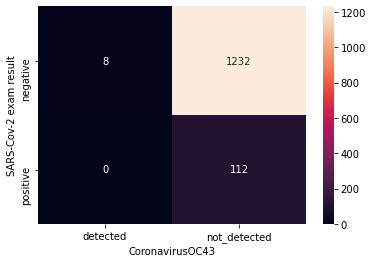

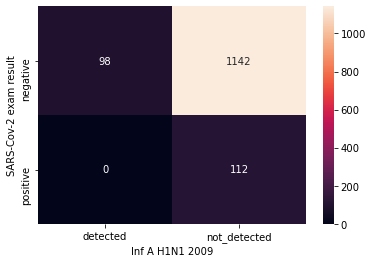

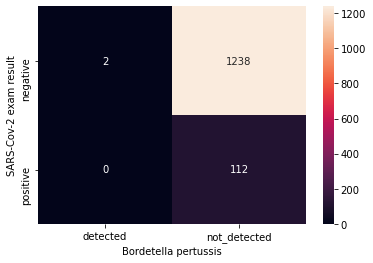

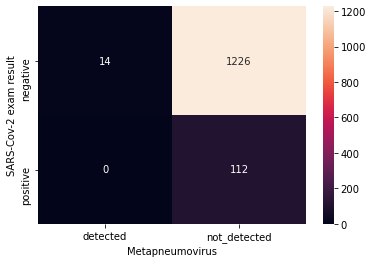

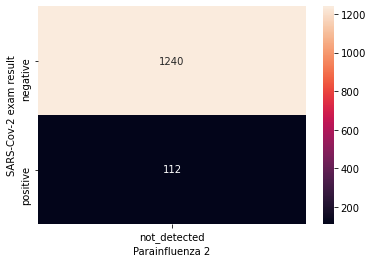

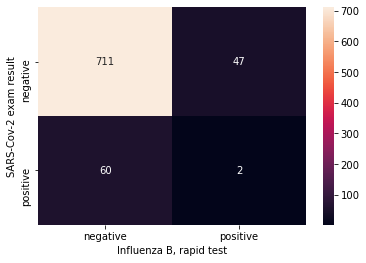

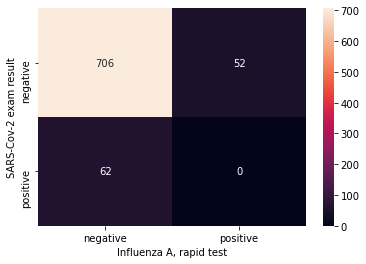

In [37]:
for column in  df.columns[df.dtypes==object]:
        if(column!='SARS-Cov-2 exam result'):
            plt.figure()
            sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[column]),annot=True,fmt='d')
        

# 9-blood data/blood data relationship

<AxesSubplot:>

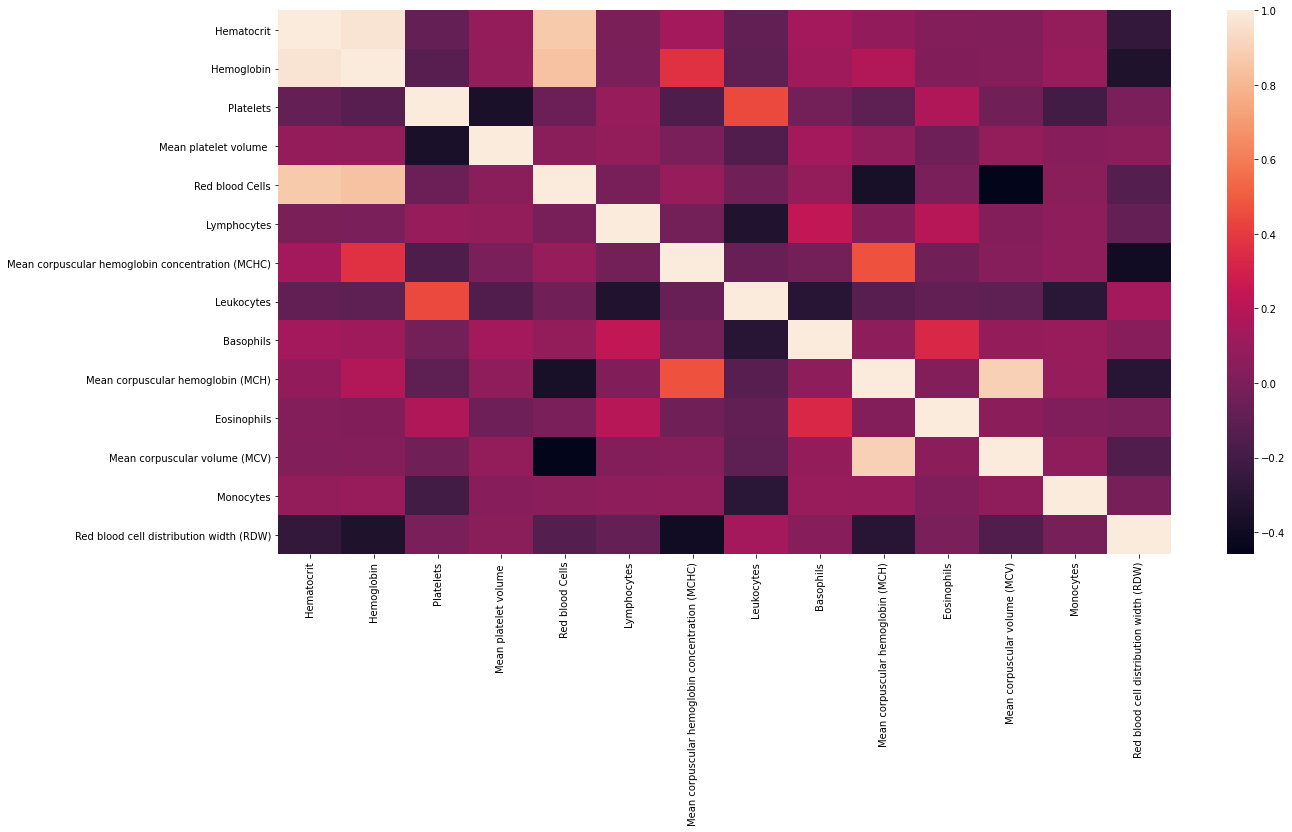

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df[df.columns[df.dtypes==float]].corr())

In [39]:
# SOme variables have strong correlation with each other

<Figure size 432x288 with 0 Axes>

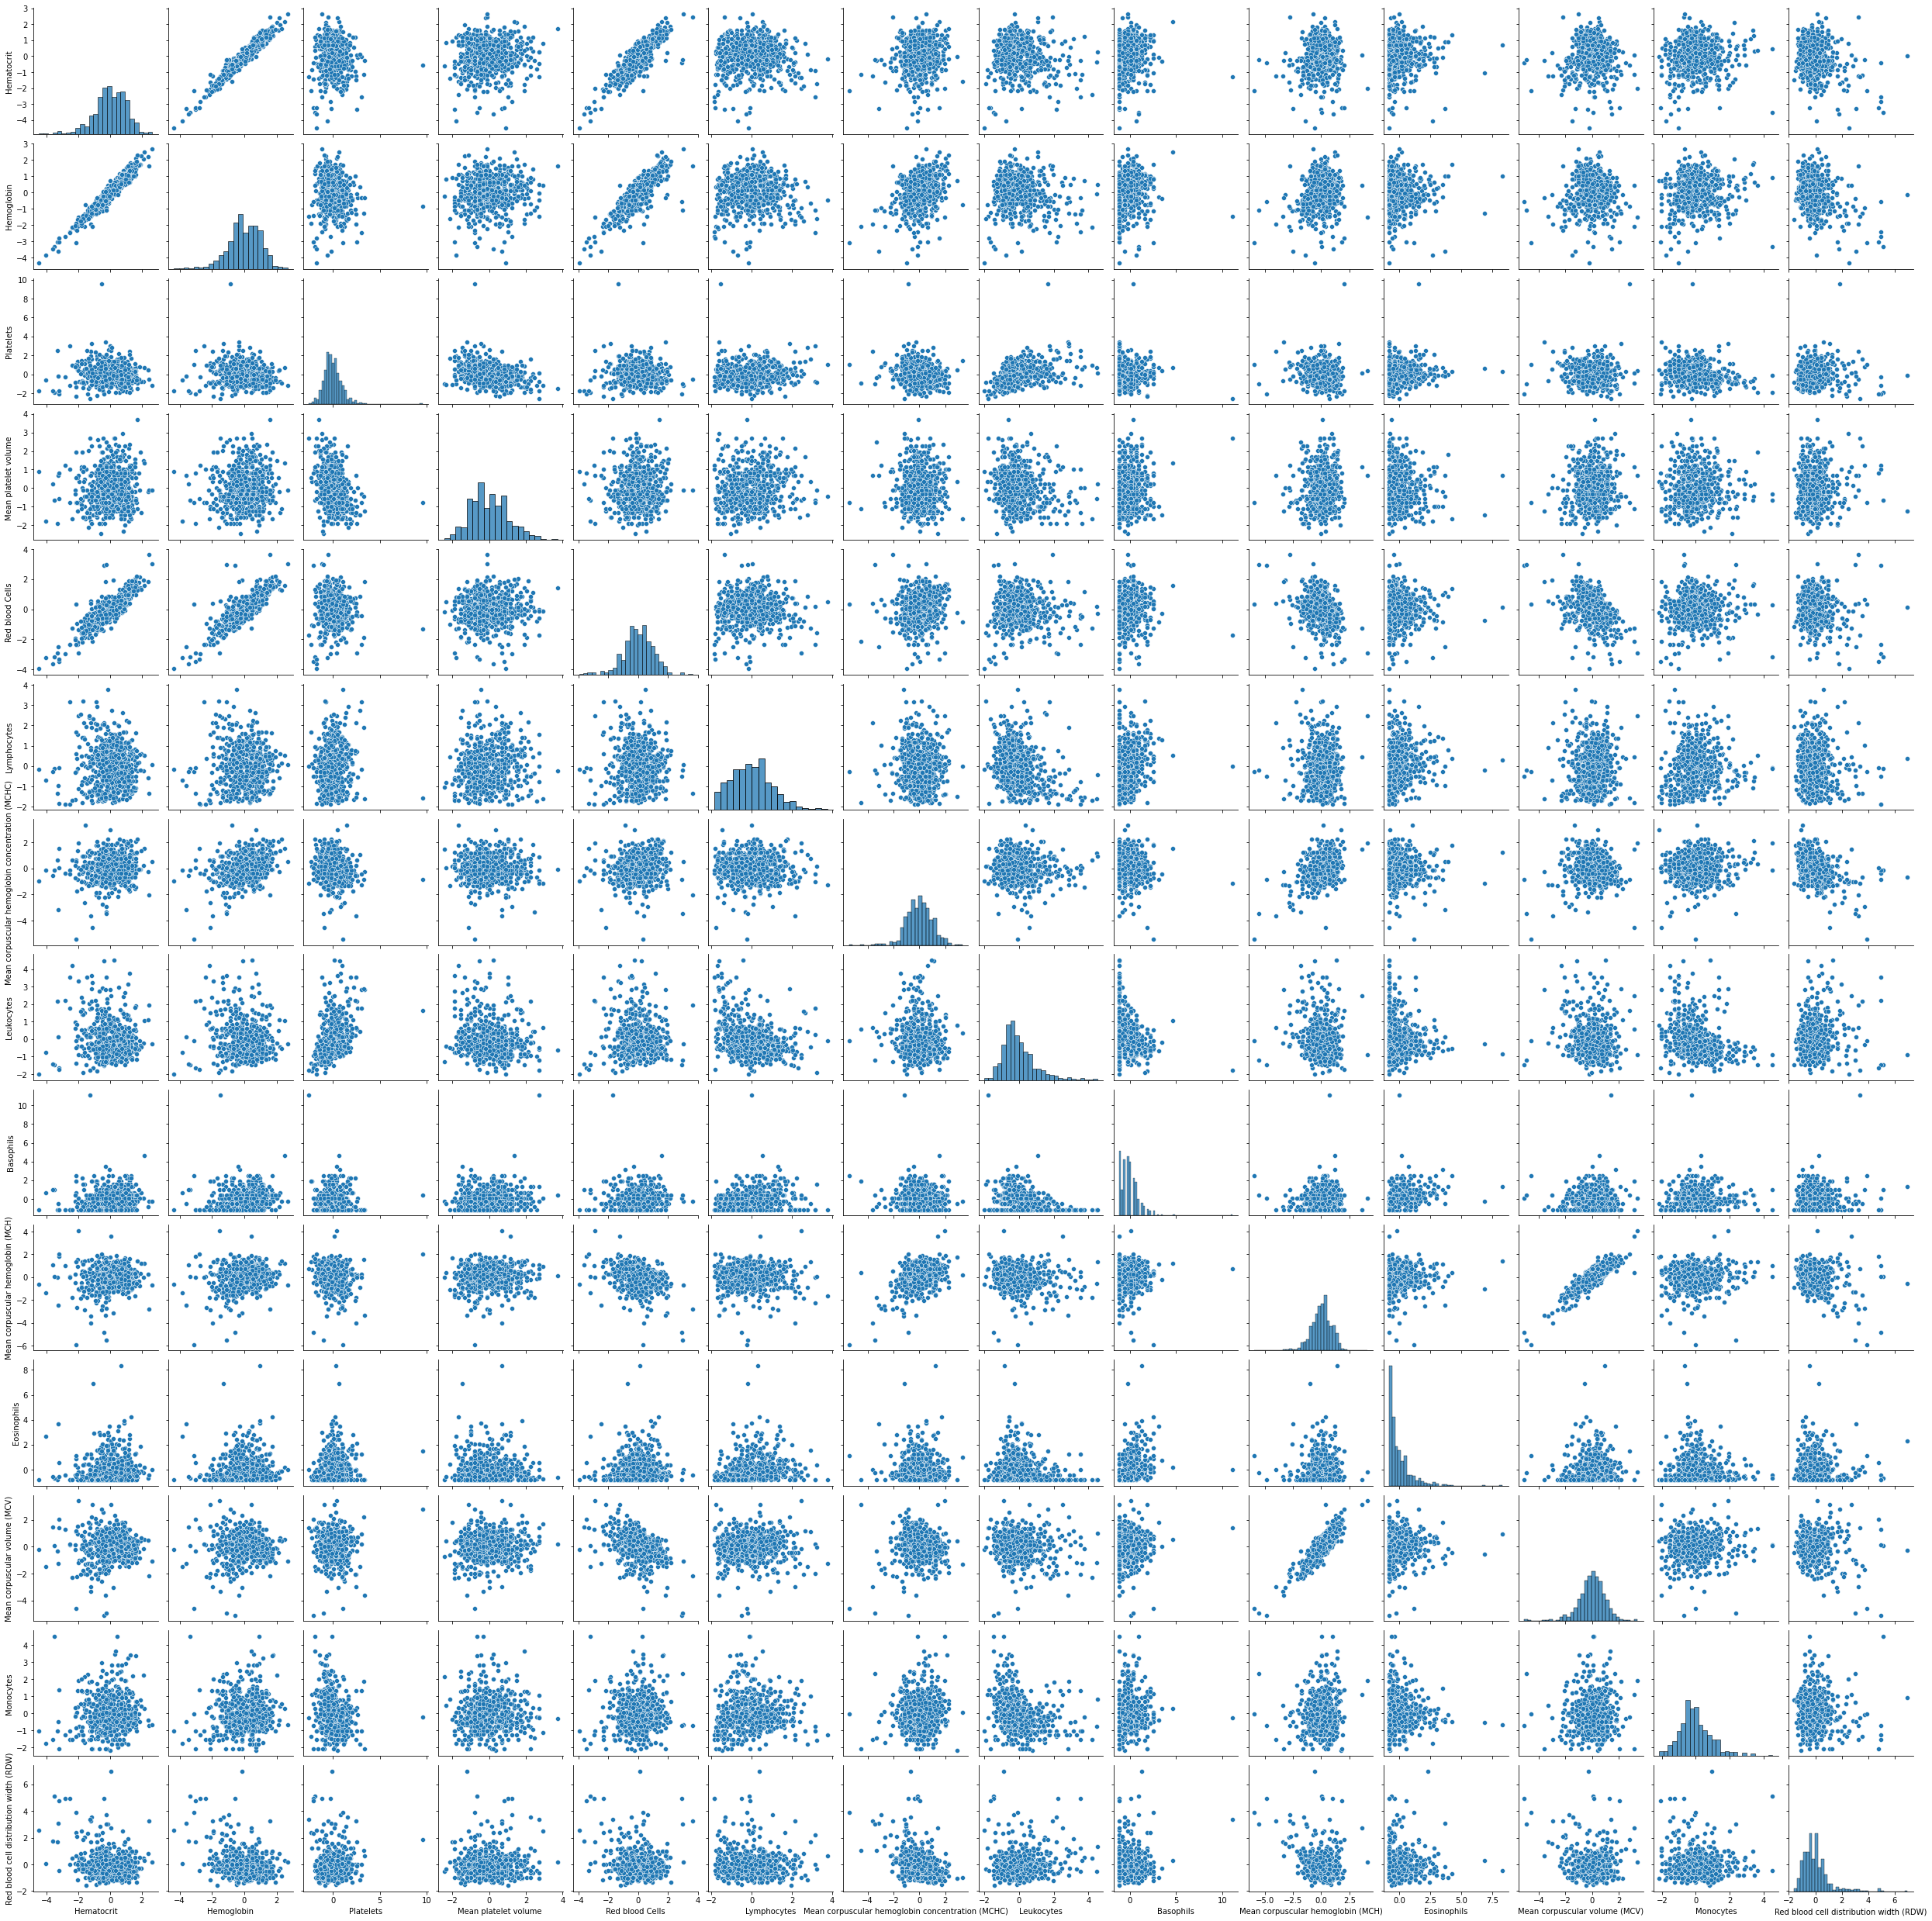

In [40]:
plt.figure()
sns.pairplot(df[df.columns[df.dtypes==float]])

# 10- blood/age

In [41]:
df.corr()['Patient age quantile']

Patient age quantile                                     1.000000
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Hematocrit                                               0.096808
Hemoglobin                                               0.060320
Platelets                                               -0.158683
Mean platelet volume                                     0.119449
Red blood Cells                                         -0.037510
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Leukocytes                                              -0.166386
Basophils                                                0.107525
Mean corpuscular hemoglobin (MCH)                        0.197394
Eosinophils                                              0.022085
Mean corpu

In [42]:
# we have a small correlation with blood level and the age 

# 11-viral/viral

In [43]:
pd.crosstab(df['Influenza A'],df['Influenza A, rapid test'])

"Influenza A, rapid test",negative,positive
Influenza A,,
detected,2,4
not_detected,245,15


In [44]:
pd.crosstab(df['Influenza B'],df['Influenza B, rapid test'])

"Influenza B, rapid test",negative,positive
Influenza B,,
detected,18,11
not_detected,233,4


In [45]:
# the influenza rapid test , is not reliable

# 12- hospitalisation/target

In [46]:
pd.crosstab(df['Patient addmited to intensive care unit (1=yes, 0=no)'],df['SARS-Cov-2 exam result'])

SARS-Cov-2 exam result,negative,positive
"Patient addmited to intensive care unit (1=yes, 0=no)",,
0,5053,550
1,33,8


In [47]:
pd.crosstab(df['Patient addmited to regular ward (1=yes, 0=no)'],df['SARS-Cov-2 exam result'])

SARS-Cov-2 exam result,negative,positive
"Patient addmited to regular ward (1=yes, 0=no)",,
0,5043,522
1,43,36


In [48]:
pd.crosstab(df['Patient addmited to semi-intensive unit (1=yes, 0=no)'],df['SARS-Cov-2 exam result'])

SARS-Cov-2 exam result,negative,positive
"Patient addmited to semi-intensive unit (1=yes, 0=no)",,
0,5044,550
1,42,8


In [51]:
# the hospitalisation has no significant impact to our target variable

# II-Data preprocessing

In [53]:
df=df.dropna()
df=df.reset_index()

In [54]:
from sklearn.model_selection import train_test_split
trainset,testset=train_test_split(df,test_size=0.2, random_state =0)

In [55]:
def encoded (data):
            code={'positive':1,'negative':0,'not_detected':0,'detected':1}
            for column in data.columns[data.dtypes==object]:
                 data.loc[:,column]=df[column].map(code)
            return(data)

In [56]:
def extract(data):
    x=data.drop('SARS-Cov-2 exam result',axis=1)
    y=data['SARS-Cov-2 exam result']
    return(x,y)

In [57]:
trainset=encoded(trainset)
trainset=trainset.reset_index(drop=True)
testset=encoded(testset)
testset=testset.reset_index(drop=True)
x_train,y_train=extract(trainset)
x_test,y_test=extract(testset)

# III-Modelization

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

In [59]:
svc=make_pipeline(StandardScaler(),SelectKBest(k=5),SVC())
Decisiontree=make_pipeline(SelectKBest(k=5),DecisionTreeClassifier())
knn=make_pipeline(SelectKBest(k=5),KNeighborsClassifier())
RandomForest=make_pipeline(SelectKBest(),RandomForestClassifier())
AdaBoost=make_pipeline(SelectKBest(k=5),AdaBoostClassifier())
List_of_models={svc:'SVC',Decisiontree:'DecisionTreeClassifier',knn:'KNeighborsClassifier',RandomForest:'RandomForestClassifier',AdaBoost:'AdaBoostClassifier'}

## Evaluation

In [60]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score

In [61]:
def evaluation(model):
        model=model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        print(confusion_matrix(y_pred,y_test))
        print(classification_report(y_pred,y_test))
        n,train_score,validation_score= learning_curve(model,x_train,y_train,cv=4,scoring='f1')
        plt.figure(figsize=(12,8))
        plt.title(model)
        plt.plot(n,train_score.mean(axis=1),label='train score')
        plt.plot(n,validation_score.mean(axis=1),label='validation score')
        plt.legend()

SVC
[[16  2]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.00      0.00      0.00         2

    accuracy                           0.80        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.80      0.80      0.80        20

DecisionTreeClassifier
[[16  0]
 [ 2  2]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.50      0.67         4

    accuracy                           0.90        20
   macro avg       0.94      0.75      0.80        20
weighted avg       0.91      0.90      0.89        20

KNeighborsClassifier
[[15  1]
 [ 3  1]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.50      0.25      0.33         4

    accuracy                           0.80        20
   macro avg       0.67

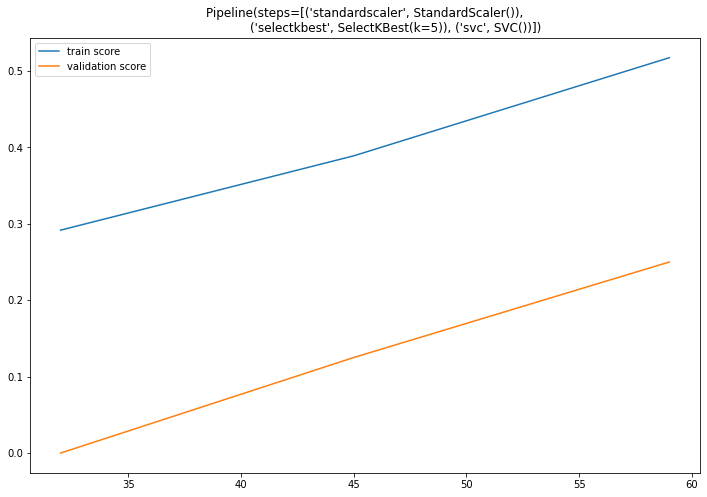

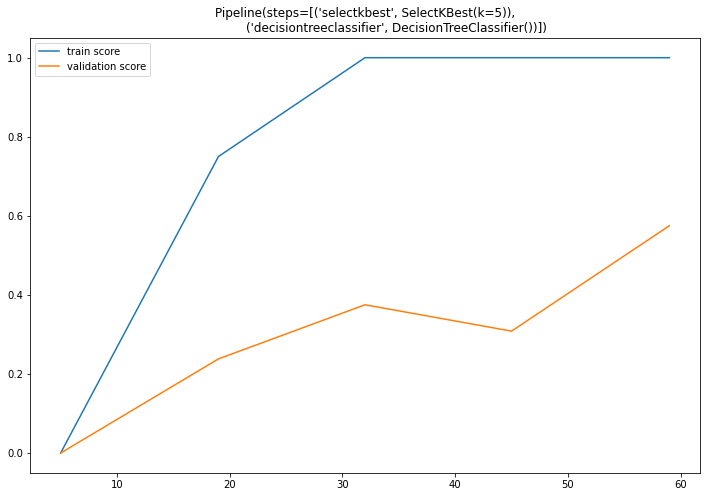

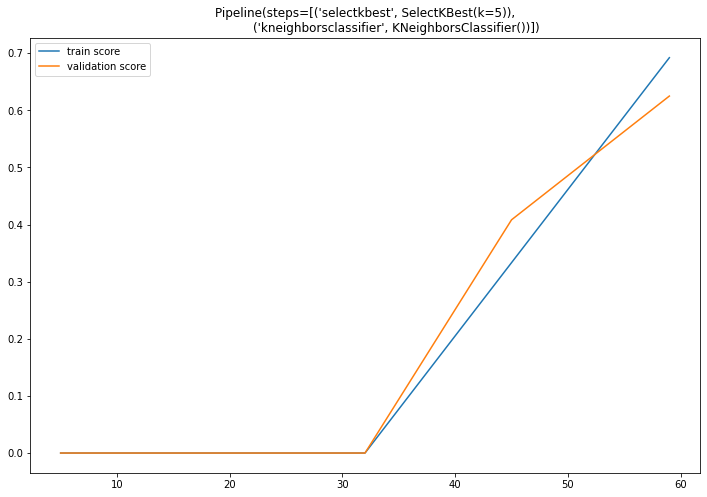

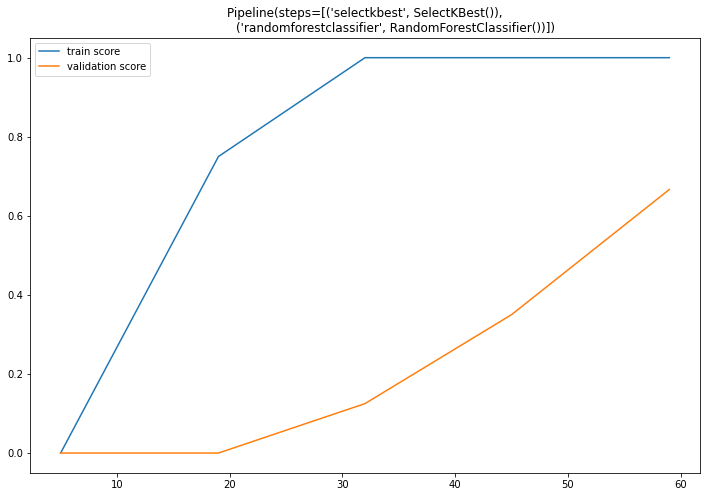

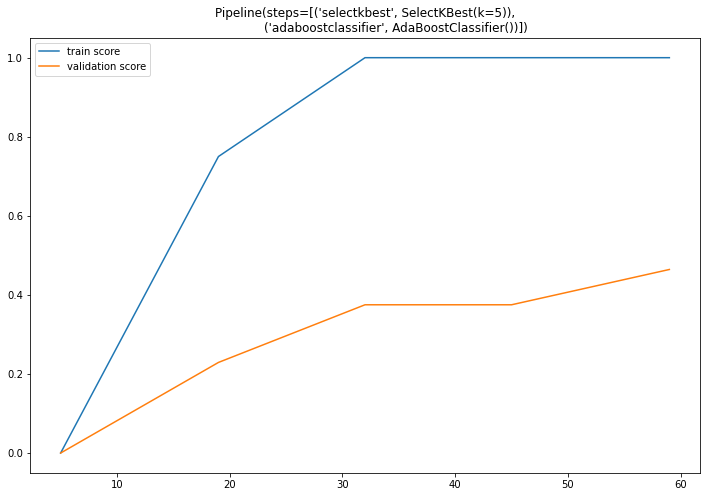

In [64]:
for model in List_of_models:
    print (List_of_models[model])
    evaluation(model)

In [65]:
# i chose to work with the randomforest model for two main reasons :
# we avoid the overfitting problem 
# precision is medium we can increase it by choosing suitable hyperparameters

## Optimization

In [66]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [67]:
n_estimators= list(range(1,100))
max_depth=list(range(1,30))
selectkbest=list(range(45,))
hyper_params = {'randomforestclassifier__n_estimators':n_estimators,'randomforestclassifier__max_depth':max_depth}

In [68]:
grid=GridSearchCV(RandomForest,hyper_params,scoring='recall',cv=4)

In [69]:
grid.fit(x_train,y_train)
print(grid.best_params_)

{'randomforestclassifier__max_depth': 7}


[[17  1]
 [ 1  1]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.50      0.50      0.50         2

    accuracy                           0.90        20
   macro avg       0.72      0.72      0.72        20
weighted avg       0.90      0.90      0.90        20



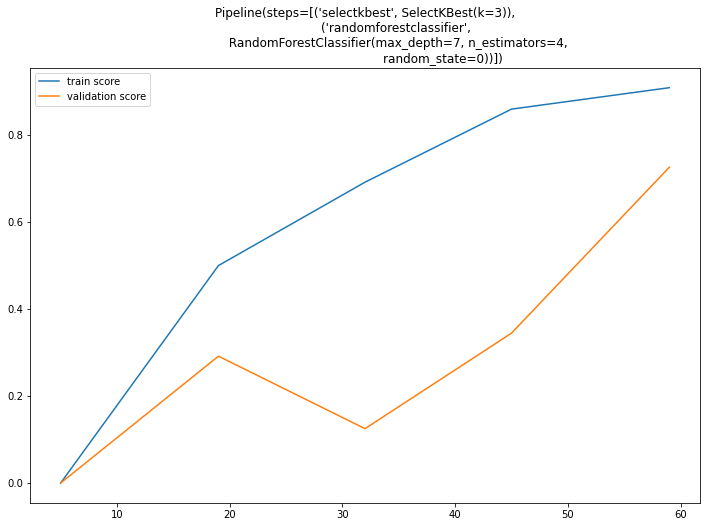

In [76]:
model=make_pipeline(SelectKBest(k=3),RandomForestClassifier(n_estimators=4,max_depth=7,random_state=0))
evaluation(model)